In [1]:
!pip install h5py

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
%matplotlib inline
from sklearn import linear_model
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn.metrics import multilabel_confusion_matrix, precision_score
from xgboost import XGBClassifier
import numpy as np
import seaborn as sn
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from keras import Sequential
from keras.layers import Dense, Dropout
from keras import backend
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, KFold
from keras.utils.np_utils import to_categorical
from keras.utils import plot_model
from sklearn.metrics import precision_score, recall_score
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import Adam, SGD
import numpy
import yellowbrick
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from yellowbrick.classifier import ConfusionMatrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import LogisticRegression
from sklearn.tree import ExtraTreeClassifier

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Using TensorFlow backend.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
dataset = pd.read_csv('/content/gdrive/My Drive/Accidentesfa.csv',engine='python', sep=';', encoding = 'latin-1')

In [0]:
encoder = LabelEncoder()

In [0]:
dataset['Localidad']=encoder.fit_transform(dataset.Localidad.values)
dataset['Dia']=encoder.fit_transform(dataset.Dia.values)
dataset['TipoVia1']=encoder.fit_transform(dataset.TipoVia1.values)
dataset['NumeroVia1']=encoder.fit_transform(dataset.NumeroVia1.values)
dataset['LetraVia1']=encoder.fit_transform(dataset.LetraVia1.values)
dataset['CardinalVia1']=encoder.fit_transform(dataset.CardinalVia1.values)
dataset['TipoVia2']=encoder.fit_transform(dataset.TipoVia2.values)
dataset['LetraVia2']=encoder.fit_transform(dataset.LetraVia2.values)
dataset['CardinalVia2']=encoder.fit_transform(dataset.CardinalVia2.values)
dataset['Municipio']=encoder.fit_transform(dataset.Municipio.values)
dataset['TipoDiseno']=encoder.fit_transform(dataset.TipoDiseno.values)
dataset['TipoTiempo']=encoder.fit_transform(dataset.TipoTiempo.values)
dataset['CorredorVial']=encoder.fit_transform(dataset.CorredorVial.values)
dataset['LLevaCinturon']=encoder.fit_transform(dataset.LLevaCinturon.values)
dataset['LLevaChaleco']=encoder.fit_transform(dataset.LLevaChaleco.values)
dataset['LLevaCasco']=encoder.fit_transform(dataset.LLevaCasco.values)
dataset['Sexo']=encoder.fit_transform(dataset.Sexo.values)
dataset['PortaLicencia']=encoder.fit_transform(dataset.PortaLicencia.values)
dataset['CodigoCategoriaLicencia']=encoder.fit_transform(dataset.CodigoCategoriaLicencia.values)
dataset['CodigoRestriccionLicencia']=encoder.fit_transform(dataset.CodigoRestriccionLicencia.values)
dataset['CausaConductorICo']=encoder.fit_transform(dataset.CausaConductorICo.values)
dataset['VehiculoEnFuga']=encoder.fit_transform(dataset.VehiculoEnFuga.values)
dataset['CodigoMarcaVehiculo']=encoder.fit_transform(dataset.CodigoMarcaVehiculo.values)
dataset['ClaseVehiculo']=encoder.fit_transform(dataset.ClaseVehiculo.values)
dataset['ServicioVehiculo']=encoder.fit_transform(dataset.ServicioVehiculo.values)
dataset['ModalidadVehiculo']=encoder.fit_transform(dataset.ModalidadVehiculo.values)
dataset['TipoFalla']=encoder.fit_transform(dataset.TipoFalla.values)
dataset['ANO']=encoder.fit_transform(dataset.ANO.values)
dataset['ModeloVehiculo']=encoder.fit_transform(dataset.ModeloVehiculo.values)
dataset['EDAD_PROCESADA']=encoder.fit_transform(dataset.EDAD_PROCESADA.values)

In [0]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, 49:50].values

In [7]:
encoder.fit(y)
encoded_Y = encoder.transform(y)
temp_y = np_utils.to_categorical(encoded_Y, num_classes=3)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, temp_y, test_size = 0.2)

In [0]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size = 0.2)

In [10]:
print('Tamano de X_train: ',X_train.shape)
print('Tamano de X_test: ',X_test.shape)
print('Tamano de y_train: ',y_train.shape)
print('Tamano de y_test: ', y_test.shape)

Tamano de X_train:  (52466, 48)
Tamano de X_test:  (13117, 48)
Tamano de y_train:  (52466, 3)
Tamano de y_test:  (13117, 3)


In [11]:
model_1 = Sequential()
model_1.add(Dense(8, activation='relu', input_dim=48))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(100, activation='relu'))
model_1.add(Dense(3, activation='softmax'))
model_1.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 392       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_3 (Dense)              (None, 100)               6500      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 303       
Total params: 7,771
Trainable params: 7,771
Non-trainable params: 0
_________________________________________________________________


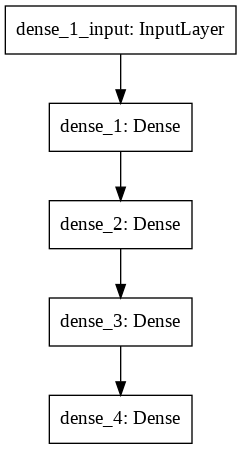

In [12]:
plot_model(model_1, 'model_1.png')

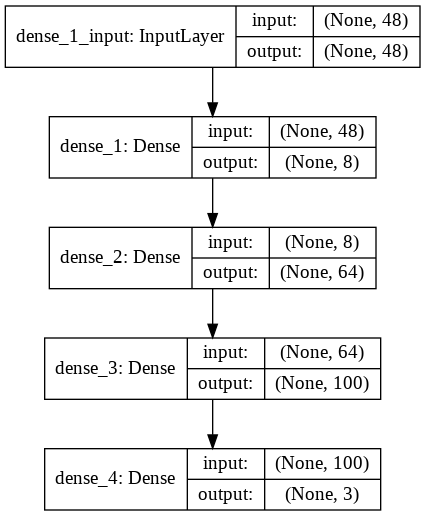

In [13]:
plot_model(model_1, 'model_1_shape.png', show_shapes=True)

In [14]:
model_1.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.009, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['acc'])

In [15]:
history_1 = model_1.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1, batch_size=128)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 52466 samples, validate on 13117 samples
Epoch 1/30





52466/52466 [==============================] - 1s 26us/step - loss: 10.8995 - acc: 0.3236 - val_loss: 10.9731 - val_acc: 0.3192
Epoch 2/30
52466/52466 [==============================] - 1s 15us/step - loss: 10.9318 - acc: 0.3218 - val_loss: 10.9731 - val_acc: 0.3192
Epoch 3/30
52466/52466 [==============================] - 1s 15us/step - loss: 10.9318 - acc: 0.3218 - val_loss: 10.9731 - val_acc: 0.3192
Epoch 4/30
52466/52466 [==============================] - 1s 15us/step - loss: 10.9318 - acc: 0.3218 - val_loss: 10.9731 - val_acc: 0.3192
Epoch 5/30
52466/52466 [==============================] - 1s 15us/step - loss: 10.9318 - acc: 0.3218 - val_loss: 10.9731 - val_acc: 0.3192
Epoch 6/30
52466/52466 [==============================] - 1s 15us/step - loss: 10.9318 - acc: 0.3218 - val_loss: 10.9731 - val_acc: 0.3192
Epoch 7/30
524

In [16]:
score = model_1.evaluate(X_train, y_train)
print(score)

52466/52466 [==============================] - 1s 20us/step
[10.931791761930029, 0.32177028933477714]


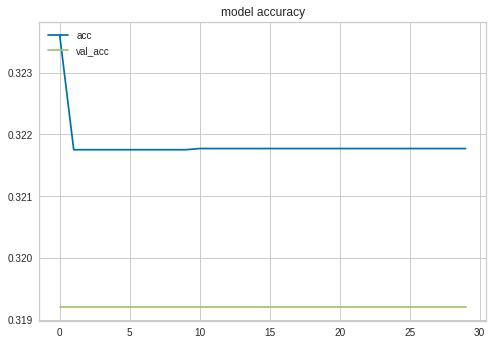

In [17]:
plt.plot(history_1.history['acc'])
plt.plot(history_1.history['val_acc'])
plt.title('model accuracy')
plt.legend(['acc','val_acc'],loc='upper left')
plt.show()

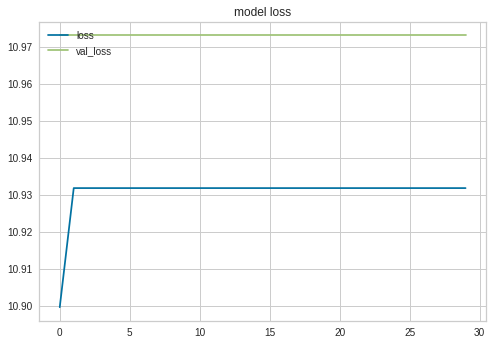

In [18]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.legend(['loss','val_loss'],loc='upper left')
plt.show()

In [19]:
model_2 = Sequential()
model_2.add(Dense(50, activation='relu', input_dim=48))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(100, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(3, activation='softmax'))
model_2.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                2450      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                3264      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               6500      
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 303       
Tota

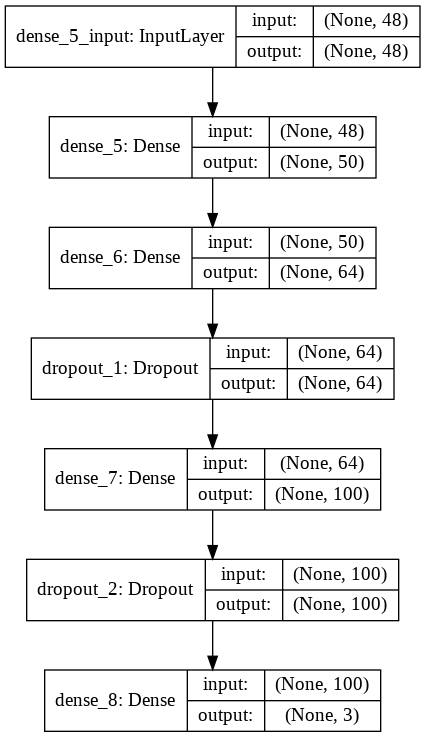

In [20]:
plot_model(model_2, 'model_2_shape.png', show_shapes=True)

In [0]:
model_2.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['acc'])

In [22]:
history_2 = model_2.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), verbose=1, batch_size=128)

Train on 52466 samples, validate on 13117 samples
Epoch 1/15
52466/52466 [==============================] - 1s 27us/step - loss: 3.6106 - acc: 0.7069 - val_loss: 0.7038 - val_acc: 0.7551
Epoch 2/15
52466/52466 [==============================] - 1s 19us/step - loss: 0.7048 - acc: 0.7507 - val_loss: 0.6694 - val_acc: 0.7601
Epoch 3/15
52466/52466 [==============================] - 1s 19us/step - loss: 0.6666 - acc: 0.7593 - val_loss: 0.6643 - val_acc: 0.7644
Epoch 4/15
52466/52466 [==============================] - 1s 20us/step - loss: 0.6638 - acc: 0.7615 - val_loss: 0.6531 - val_acc: 0.7659
Epoch 5/15
52466/52466 [==============================] - 1s 21us/step - loss: 0.6556 - acc: 0.7635 - val_loss: 0.6440 - val_acc: 0.7662
Epoch 6/15
52466/52466 [==============================] - 1s 21us/step - loss: 0.6035 - acc: 0.7592 - val_loss: 0.5737 - val_acc: 0.7654
Epoch 7/15
52466/52466 [==============================] - 1s 21us/step - loss: 0.5812 - acc: 0.7622 - val_loss: 0.5583 - val_acc

In [23]:
score = model_2.evaluate(X_train, y_train)
print(score)

52466/52466 [==============================] - 1s 22us/step
[0.5308750726642444, 0.776121678792421]


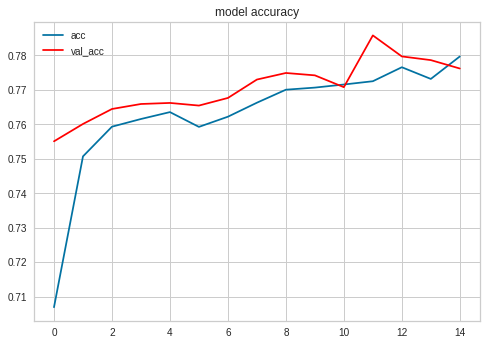

In [24]:
plt.plot(history_2.history['acc'], color='b')
plt.plot(history_2.history['val_acc'], color='red')
plt.title('model accuracy')
plt.legend(['acc','val_acc'],loc='upper left')
plt.show()

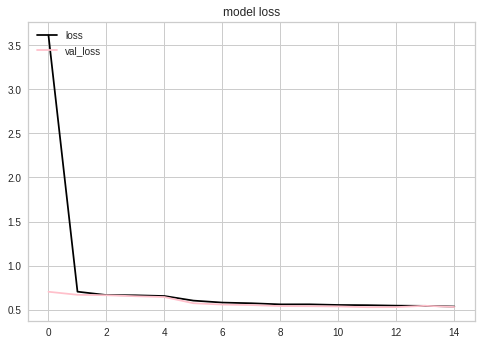

In [25]:
plt.plot(history_2.history['loss'], color='black')
plt.plot(history_2.history['val_loss'], color='pink')
plt.title('model loss')
plt.legend(['loss','val_loss'],loc='upper left')
plt.show()

In [26]:
model_3 = Sequential()
model_3.add(Dense(50, activation='relu', input_dim=48))
model_3.add(Dense(100, activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(100, activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(3, activation='softmax'))
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 50)                2450      
_________________________________________________________________
dense_10 (Dense)             (None, 100)               5100      
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 303       
Total params: 17,953
Trainable params: 17,953
Non-trainable params: 0
__________________________________________________

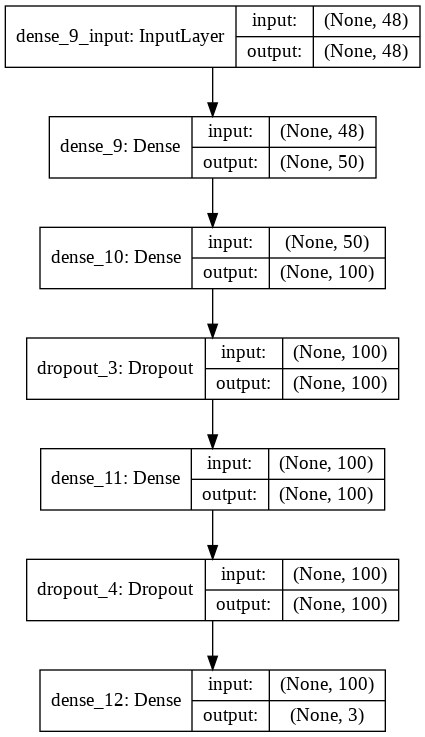

In [27]:
plot_model(model_3, 'model_3_shape.png', show_shapes=True)

In [0]:
model_3.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['acc','mse'])

In [29]:
history_3 = model_3.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=1, batch_size=8)

Train on 52466 samples, validate on 13117 samples
Epoch 1/20
52466/52466 [==============================] - 12s 227us/step - loss: 3.1853 - acc: 0.7285 - mean_squared_error: 0.1666 - val_loss: 0.6717 - val_acc: 0.7635 - val_mean_squared_error: 0.1196
Epoch 2/20
52466/52466 [==============================] - 12s 221us/step - loss: 0.6702 - acc: 0.7586 - mean_squared_error: 0.1208 - val_loss: 0.6625 - val_acc: 0.7631 - val_mean_squared_error: 0.1181
Epoch 3/20
52466/52466 [==============================] - 12s 220us/step - loss: 0.6501 - acc: 0.7566 - mean_squared_error: 0.1217 - val_loss: 0.5867 - val_acc: 0.7681 - val_mean_squared_error: 0.1198
Epoch 4/20
52466/52466 [==============================] - 12s 222us/step - loss: 0.5836 - acc: 0.7628 - mean_squared_error: 0.1192 - val_loss: 0.5752 - val_acc: 0.7713 - val_mean_squared_error: 0.1178
Epoch 5/20
52466/52466 [==============================] - 12s 224us/step - loss: 0.5738 - acc: 0.7673 - mean_squared_error: 0.1175 - val_loss: 0.5

In [30]:
score = model_3.evaluate(X_train, y_train)
print(score)

52466/52466 [==============================] - 1s 23us/step
[0.4804307695899822, 0.8135554454222385, 0.09500477764461106]


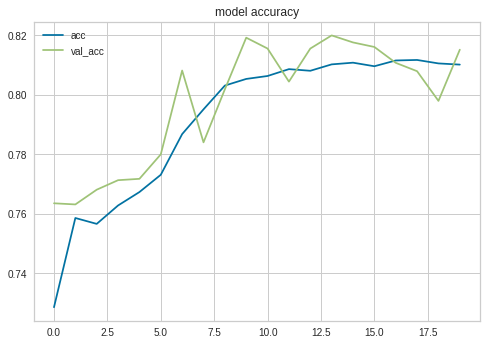

In [31]:
plt.plot(history_3.history['acc'], color='b')
plt.plot(history_3.history['val_acc'], color='g')
plt.title('model accuracy')
plt.legend(['acc','val_acc'],loc='upper left')
plt.show()

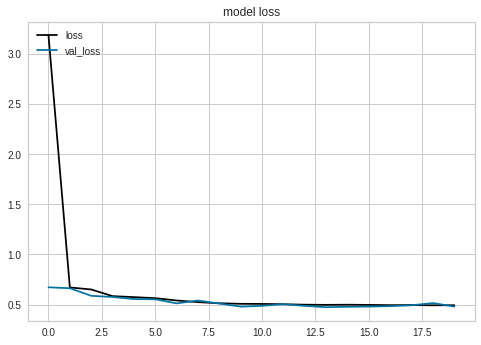

In [32]:
plt.plot(history_3.history['loss'], color='black')
plt.plot(history_3.history['val_loss'], color='b')
plt.title('model loss')
plt.legend(['loss','val_loss'],loc='upper left')
plt.show()

In [33]:
seed = 7
numpy.random.seed(seed)
def baseline_model():
  model_4 = Sequential()
  model_4.add(Dense(8, input_dim=48, activation='relu'))
  model_4.add(Dense(100, activation='relu'))
  model_4.add(Dropout(0.2))
  model_4.add(Dense(64, activation='relu'))
  model_4.add(Dropout(0.2))
  model_4.add(Dense(64, activation='relu'))
  model_4.add(Dropout(0.2))
  model_4.add(Dense(3, activation='softmax'))
  model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
  return model_4
estimator = KerasClassifier(build_fn=baseline_model, epochs=15, batch_size=8,verbose=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 81.17% (0.91%)


In [36]:
history_4 = estimator.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=20, verbose=1, batch_size=8)

Train on 52466 samples, validate on 13117 samples
Epoch 1/20
52466/52466 [==============================] - 16s 300us/step - loss: 1.0997 - acc: 0.7272 - val_loss: 0.5858 - val_acc: 0.7560
Epoch 2/20
52466/52466 [==============================] - 13s 257us/step - loss: 0.5906 - acc: 0.7551 - val_loss: 0.5780 - val_acc: 0.7624
Epoch 3/20
52466/52466 [==============================] - 14s 261us/step - loss: 0.5818 - acc: 0.7621 - val_loss: 0.5790 - val_acc: 0.7664
Epoch 4/20
52466/52466 [==============================] - 13s 257us/step - loss: 0.5664 - acc: 0.7666 - val_loss: 0.5415 - val_acc: 0.7765
Epoch 5/20
52466/52466 [==============================] - 14s 271us/step - loss: 0.5431 - acc: 0.7799 - val_loss: 0.5194 - val_acc: 0.7966
Epoch 6/20
52466/52466 [==============================] - 14s 260us/step - loss: 0.5237 - acc: 0.7930 - val_loss: 0.5085 - val_acc: 0.8008
Epoch 7/20
52466/52466 [==============================] - 14s 258us/step - loss: 0.5187 - acc: 0.7980 - val_loss: 0.

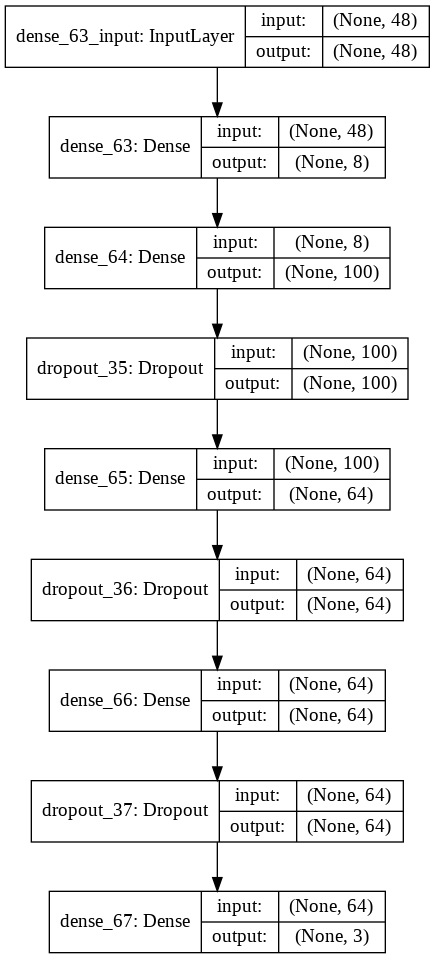

In [37]:
plot_model(estimator.model, 'model_4_shape.png', show_shapes=True)

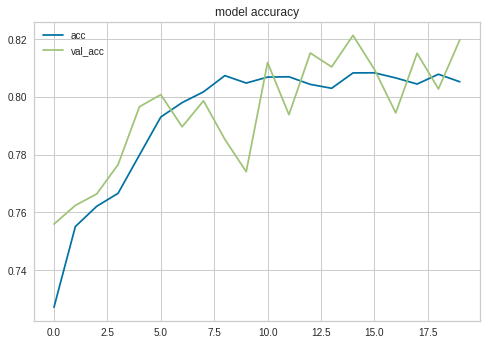

In [38]:
plt.plot(history_4.history['acc'], color='b')
plt.plot(history_4.history['val_acc'], color='g')
plt.title('model accuracy')
plt.legend(['acc','val_acc'],loc='upper left')
plt.show()

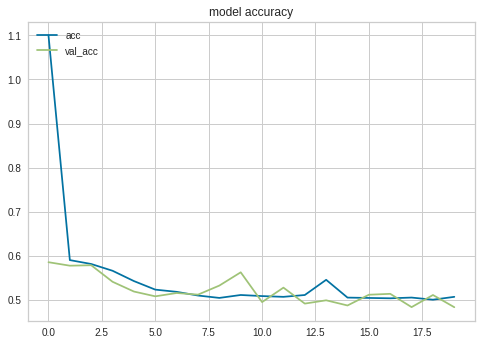

In [39]:
plt.plot(history_4.history['loss'], color='b')
plt.plot(history_4.history['val_loss'], color='g')
plt.title('model accuracy')
plt.legend(['acc','val_acc'],loc='upper left')
plt.show()

In [40]:
model_5 = MLPClassifier()
model_5.fit(X_train_2, y_train_2)
y_pred_5 = model_5.predict(X_test_2)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[   1  123   81]
 [   3 1974 2217]
 [   0  223 8495]]


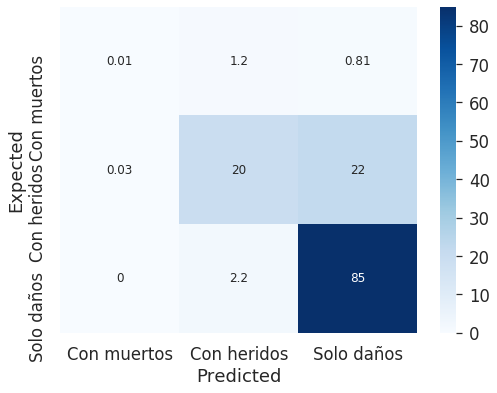

              precision    recall  f1-score   support

           1       0.25      0.00      0.01       205
           2       0.85      0.47      0.61      4194
           3       0.79      0.97      0.87      8718

    accuracy                           0.80     13117
   macro avg       0.63      0.48      0.50     13117
weighted avg       0.80      0.80      0.77     13117



In [41]:
conf_mat_5 = confusion_matrix(y_test_2, y_pred_5)
print(conf_mat_5)
labels = ['Con muertos', 'Con heridos','Solo daños']
plt.figure(figsize=(8, 6))
sn.set(font_scale=1.5)
sn.heatmap(conf_mat_5/100, annot=True, annot_kws={"size": 12}, cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels) # font size
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()
print (classification_report(y_test_2, y_pred_5))

In [0]:
model_6 = DecisionTreeClassifier(criterion = 'entropy')

In [43]:
model_6.fit(X_train_2, y_train_2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
y_pred_6 = model_6.predict(X_test_2)

In [0]:
conf_mat_6 = confusion_matrix(y_test_2, y_pred_6)

[[  31  128   46]
 [ 160 2666 1368]
 [  54 1401 7263]]


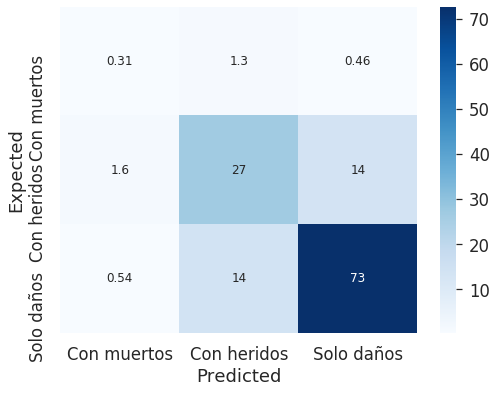

In [46]:
labels = ['Con muertos', 'Con heridos','Solo daños']
plt.figure(figsize=(8, 6))
sn.set(font_scale=1.5)
print(conf_mat_6)
sn.heatmap(conf_mat_6/100, annot=True, annot_kws={"size": 12}, cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels) # font size
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [47]:
model_7 = XGBClassifier(solver='lbfgs', alpha=1e-5,
...                     hidden_layer_sizes=(5, 2), random_state=1)
model_7.fit(X_train_2, y_train_2)
y_pred_7 = model_7.predict(X_test_2)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
accuracy = accuracy_score(y_test_2, y_pred_7)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.93%


[[   2  151   52]
 [   0 2471 1723]
 [   0  313 8405]]


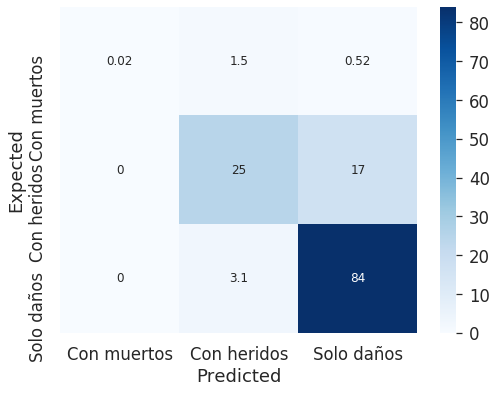

              precision    recall  f1-score   support

           1       1.00      0.01      0.02       205
           2       0.84      0.59      0.69      4194
           3       0.83      0.96      0.89      8718

    accuracy                           0.83     13117
   macro avg       0.89      0.52      0.53     13117
weighted avg       0.83      0.83      0.81     13117



In [49]:
conf_mat_7 = confusion_matrix(y_test_2, y_pred_7)
labels = ['Con muertos', 'Con heridos','Solo daños']
plt.figure(figsize=(8, 6))
print(conf_mat_7)
sn.set(font_scale=1.5) # for label size
sn.heatmap(conf_mat_7/100, annot=True, annot_kws={"size": 12}, cmap = plt.cm.Blues, xticklabels=labels, yticklabels=labels) # font size
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()
print (classification_report(y_test_2, y_pred_7))

In [50]:
model_8 = RandomForestClassifier()
model_8.fit(X_train_2, y_train_2)
y_pred_8 = model_8.predict(X_test_2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


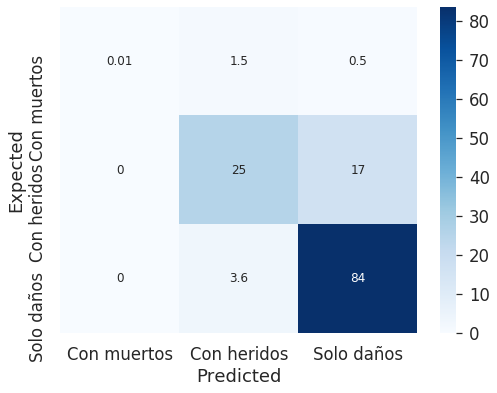

              precision    recall  f1-score   support

           1       1.00      0.00      0.01       205
           2       0.83      0.60      0.70      4194
           3       0.83      0.96      0.89      8718

    accuracy                           0.83     13117
   macro avg       0.89      0.52      0.53     13117
weighted avg       0.83      0.83      0.81     13117



In [51]:
conf_mat_8 = confusion_matrix(y_test_2, y_pred_8)

labels = ['Con muertos', 'Con heridos','Solo daños']
plt.figure(figsize=(8, 6))
sn.set(font_scale=1.5)
sn.heatmap(conf_mat_8/100, annot=True, annot_kws={"size": 12}, cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels) # font size
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()
print (classification_report(y_test_2, y_pred_8))

In [0]:
model_9 = ExtraTreeClassifier(random_state=0)
model_9.fit(X_train_2, y_train_2)
y_pred_9 = model_9.predict(X_test_2)

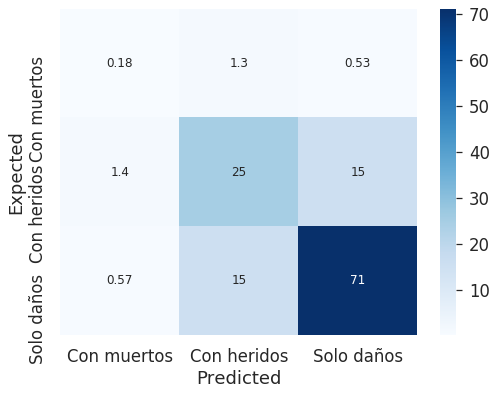

              precision    recall  f1-score   support

           1       0.08      0.09      0.09       205
           2       0.60      0.60      0.60      4194
           3       0.82      0.82      0.82      8718

    accuracy                           0.74     13117
   macro avg       0.50      0.50      0.50     13117
weighted avg       0.74      0.74      0.74     13117



In [53]:
conf_mat_9 = confusion_matrix(y_test_2, y_pred_9)
labels = ['Con muertos', 'Con heridos','Solo daños']
plt.figure(figsize=(8, 6))
sn.set(font_scale=1.5)
sn.heatmap(conf_mat_9/100, annot=True, annot_kws={"size": 12}, cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels) # font size
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()
print (classification_report(y_test_2, y_pred_9))

In [54]:
model_10 = OneVsRestClassifier(LinearSVC(random_state=0))
model_10.fit(X_train_2, y_train_2)
y_pred_10 = model_10.predict(X_test_2)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [57]:
conf_mat_10 = confusion_matrix(y_test_2, y_pred_10)

labels = ['Con muertos', 'Con heridos','Solo daños']
plt.figure(figsize=(8, 6))
sn.set(font_scale=1.5)
sn.heatmap(y_pred_10/100, annot=True, annot_kws={"size": 12}, cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels) # font size
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()
print (classification_report(y_test_2, y_pred_10))

IndexError: ignored

<Figure size 576x432 with 0 Axes>

In [58]:
model_11 = KNeighborsClassifier()
model_11.fit(X_train_2, y_train_2)
y_pred_11 = model_11.predict(X_test_2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


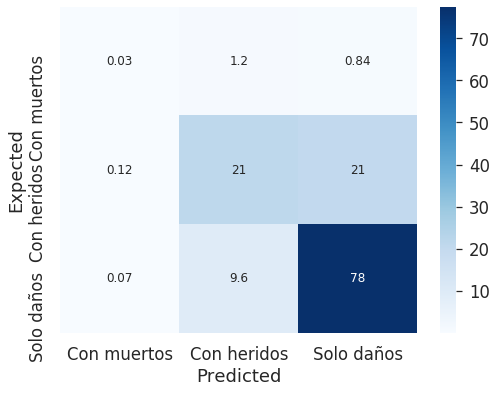

              precision    recall  f1-score   support

           1       0.14      0.01      0.03       205
           2       0.66      0.51      0.57      4194
           3       0.78      0.89      0.83      8718

    accuracy                           0.75     13117
   macro avg       0.53      0.47      0.48     13117
weighted avg       0.74      0.75      0.74     13117



In [59]:
conf_mat_11 = confusion_matrix(y_test_2, y_pred_11)

labels = ['Con muertos', 'Con heridos','Solo daños']
plt.figure(figsize=(8, 6))
sn.set(font_scale=1.5)
sn.heatmap(conf_mat_11/100, annot=True, annot_kws={"size": 12}, cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels) # font size
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()
print (classification_report(y_test_2, y_pred_11))

In [60]:
model_12 = NearestCentroid()
model_12.fit(X_train_2, y_train_2)
y_pred_12 = model_12.predict(X_test_2)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


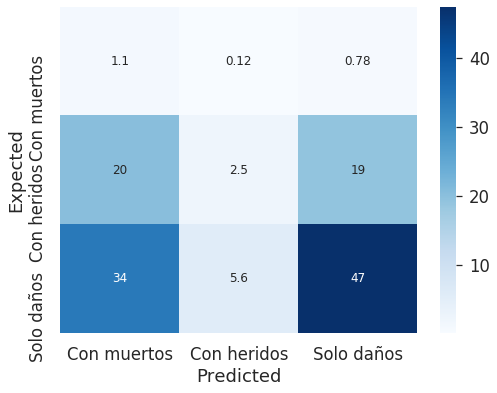

              precision    recall  f1-score   support

           1       0.02      0.56      0.04       205
           2       0.30      0.06      0.10      4194
           3       0.70      0.54      0.61      8718

    accuracy                           0.39     13117
   macro avg       0.34      0.39      0.25     13117
weighted avg       0.57      0.39      0.44     13117



In [61]:
conf_mat_12 = confusion_matrix(y_test_2, y_pred_12)

labels = ['Con muertos', 'Con heridos','Solo daños']
plt.figure(figsize=(8, 6))
sn.set(font_scale=1.5)
sn.heatmap(conf_mat_12/100, annot=True, annot_kws={"size": 12}, cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels) # font size
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()
print (classification_report(y_test_2, y_pred_12))

In [62]:
model_13 = LogisticRegression(multi_class='multinomial')
model_13.fit(X_train_2, y_train_2)
y_pred_13 = model_13.predict(X_test_2)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


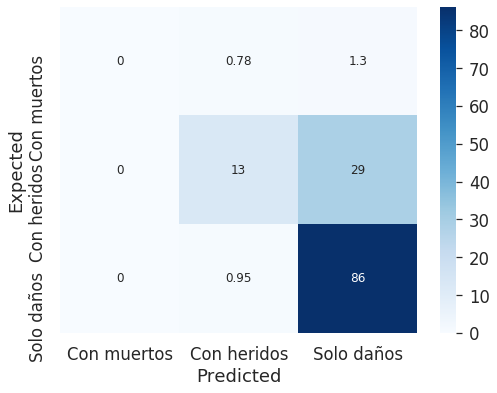

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       205
           2       0.88      0.31      0.46      4194
           3       0.74      0.99      0.85      8718

    accuracy                           0.76     13117
   macro avg       0.54      0.43      0.44     13117
weighted avg       0.78      0.76      0.71     13117



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
conf_mat_13 = confusion_matrix(y_test_2, y_pred_13)

labels = ['Con muertos', 'Con heridos','Solo daños']
plt.figure(figsize=(8, 6))
sn.set(font_scale=1.5)
sn.heatmap(conf_mat_13/100, annot=True, annot_kws={"size": 12}, cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels) # font size
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()
print (classification_report(y_test_2, y_pred_13))

In [92]:
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [122]:
joblib.dump(model_7,'/content/gdrive/My Drive/model_entrenado.pkl')

['/content/gdrive/My Drive/model_entrenado.pkl']

In [0]:
Willy_Recargado = joblib.load('/content/gdrive/My Drive/model_entrenado.pkl')

In [124]:
print('Precisión:')
Willy_Recargado.score(X_train_2, y_train_2)

Precisión:


0.8339496054587733

In [0]:
y_pred_Willy_Recargado = Willy_Recargado.predict(X_test_2)

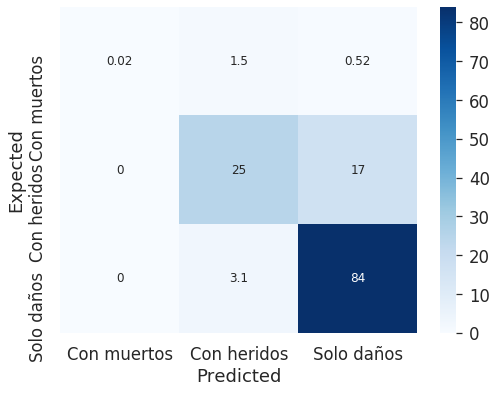

              precision    recall  f1-score   support

           1       1.00      0.01      0.02       205
           2       0.84      0.59      0.69      4194
           3       0.83      0.96      0.89      8718

    accuracy                           0.83     13117
   macro avg       0.89      0.52      0.53     13117
weighted avg       0.83      0.83      0.81     13117



In [126]:
conf_mat_Willy_Recargado = confusion_matrix(y_test_2, y_pred_Willy_Recargado)

labels = ['Con muertos', 'Con heridos','Solo daños']
plt.figure(figsize=(8, 6))
sn.set(font_scale=1.5)
sn.heatmap(conf_mat_Willy_Recargado/100, annot=True, annot_kws={"size": 12}, cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels) # font size
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()
print (classification_report(y_test_2, y_pred_Willy_Recargado))